Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Ahmed"
COLLABORATORS = ""

---

# CS110 Pre-class Work 13.2

## Question 1.

The Python class `Activity` is defined below. Each activity is characterized by its name, its start time and its finish time. Your task is to complete the `greedy_activity_selector` function, which takes a list of activities sorted by their finish times as an argument.

In [7]:

class Activity:
    def __init__(self, name, start, finish):
        self.name = name
        self.start = start
        self.finish = finish
    
def greedy_activity_selector(A):
    """
    Implements an iterative greedy algorithm to solve the activity-selection 
    problem (making use of NO recursive calls). See GREEDY-ACTIVITY-SELECTOR 
    in Cormen et al., p.421
    
    Inputs:
    - A: list of activities, instances of Activity, already sorted by finish 
    times
    
    Outputs:
    - out_list: the longest list possible of mutually compatible activities.
    """
    n = len(A)
    MCA=[]
    MCA.append(A[0])
    k=0
    for m in range(1,n):
        if A[m].start >= A[k].finish:
            MCA.append(A[m])
            k=m
    return MCA
            
            

## Question 2. 
Complete the function below.

In [15]:
def recursive_activity_selector(A, k, n):
    """
    Implements a recursive greedy algorithm to solve the activity-selection 
    problem. See RECURSIVE-ACTIVITY-SELECTOR in Cormen et al., p.419. Note 
    that in Cormen et al., the call that solves the entire problem is the call
    with k=0. Because of the 0-indexing scheme in Python, the call that solves 
    the entire problem is with k=-1 (i.e., recursive_activity_selector(A, -1, len(A)))
    
    Inputs:
    - A: list of activities, instances of Activity, already sorted by finish 
    times
    - k: int, defines the subproblem S_k it is to solve (see Cormen et al.) for 
    the definition of the subproblem S_k
    - n: int, the size n of the original problem
    
    Outputs:
    - out_list: the longest list possible of mutually compatible activities. 
    """
    # YOUR CODE HERE
    n = len(A)
    MCA=[]
    m= k+1
    while (m <=n) and (A[m].start < A[k].finish):  #k here should be equal to 0
        m = m+1
    if m <= n:
        MCA.append(A[m])
        return recursive_activity_selector
    else:
        return None    #representing phi by None in python



## Question 3. 
Compare the running time of `greedy_activity_selector` and `recursive_activity_selector` on different lengths of a random activity list. Do this by producing a plot, where the x axis is the length of the activity list (`list(range(1,1000,10))`) and the y axis is the running time. Note that:
1. Don't forget to average your results over 100 iterations for each length of the activity list.
2. The two lines for `greedy_activity_selector` and `recursive_activity_selector` should be present in the same plot (with different colors), not two separate plots, for easy comparison. 
3. To generate an random activity list of a certain length, use the function `activity_list_gen` below. 

In [4]:
import random
def activity_list_gen(n):
    finish_times = random.sample(range(n*3), n)
    finish_times.sort()
    
    start_times = []
    for ftime in finish_times:
        offset = random.randint(1,5)
        start_times.append(max(ftime-offset, 0))
    
    out_list = []
    for i in range(n):
        out_list.append(Activity(str(i), start_times[i], finish_times[i]))
    
    return out_list

In [5]:
g=activity_list_gen(10)
print(g)

[<__main__.Activity object at 0x058ED4B0>, <__main__.Activity object at 0x058ED630>, <__main__.Activity object at 0x058ED2F0>, <__main__.Activity object at 0x058ED3B0>, <__main__.Activity object at 0x058ED3F0>, <__main__.Activity object at 0x058ED930>, <__main__.Activity object at 0x058ED770>, <__main__.Activity object at 0x058ED5D0>, <__main__.Activity object at 0x058ED850>, <__main__.Activity object at 0x058EDA10>]


In [8]:
list(range(1,1000,10))
import time 
runtime=[]
for n in range(1,1000,10):
    average_time=0
    for i in range (10):
        #generating the activity list with n number of items
        act_list= activity_list_gen(n)
        a= time.time()
        greedy_activity_selector(act_list)
        b= time.time()
        #summing up all the running time for list n for different iterations
        average_time += b - a
    #calculating the average time
    runtime.append(round(average_time/10, 5))
print(runtime)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001, 0.0, 0.0001, 0.0, 0.0, 0.0, 0.0, 0.0001, 0.0001, 0.0, 0.0, 0.0, 0.0, 0.0001, 0.0001, 0.0001, 0.0, 0.0001, 0.0003, 0.0, 0.0, 0.0001, 0.0001, 0.0002, 0.0001, 0.0002, 0.0, 0.0001, 0.0001, 0.0, 0.0003, 0.0002, 0.0001, 0.0002, 0.0002, 0.0002, 0.0001, 0.0002, 0.0001, 0.0002, 0.0002, 0.0001, 0.0002, 0.0001, 0.0002, 0.0002, 0.0002, 0.0002, 0.0, 0.0003, 0.0001, 0.0003, 0.0003, 0.0002, 0.0003, 0.0001, 0.0001, 0.0001, 0.0, 0.0, 0.0, 0.0, 0.00156, 0.0, 0.0001, 0.0003, 0.0004, 0.00062, 0.00029, 0.0001, 0.00011, 0.0003, 0.0001, 0.0004, 0.0001, 0.0002, 0.0003, 0.0002, 0.00029, 0.0004, 0.00029, 0.0003, 0.00029, 0.00029, 0.0003, 0.0001, 0.00041, 0.0, 0.0004, 0.0001, 0.0007, 0.0004, 0.00029]


In [16]:
#I am getting out of range error in line 23, but not sure how to fix the problem
import time 
runtime2=[]
for n in range(1,1000,10):
    average_time=0
    for i in range (10):
        #generating the activity list with n number of items
        act_list= activity_list_gen(n)
        a= time.time()
        k=-1
        recursive_activity_selector(act_list, k ,len(act_list))
        b= time.time()
        #summing up all the running time for list n for different iterations
        average_time += b - a
    #calculating the average time
    runtime2.append(round(average_time/10, 5))
print(runtime2)

IndexError: list index out of range

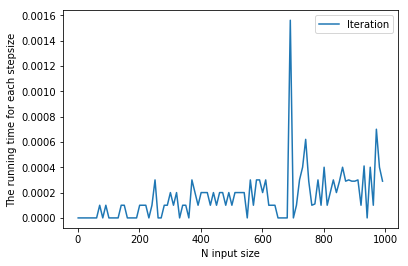

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
x = list(range(1,1000,10))





fig, ax = plt.subplots()

ax.plot(x,runtime, label="Iteration")


ax.set_xlabel('N input size')
ax.set_ylabel('The running time for each stepsize')

leg = ax.legend();

## Question 4. 
Explain the results in question 3.

As we can see from the greedy algorithm graph, the running time is directly proportional to (N input size). The time complexity for the greedy algorithm is linear O(n)
Although I am having an error in building the recursive_activity_selector, I am assuming that we will have a similar time complexity of O(n) but maybe with different constants. 

## [Optional] Question 5. 
Overload the operator "<" for a comparison between two instances of the class Activity so that A.sort() will sort A, a list of activities, by their finish times.

**This might be very helpful for your final project, so please try this exercise and reach out to the TAs if you'd like to further discuss Overloading in Python**

In [ ]:
import copy
class Activity:
    def __init__(self, name, start, finish):
        self.name = name
        self.start = start
        self.finish = finish
    
    def __lt__(self, other):
        # YOUR CODE HERE
        raise NotImplementedError()

# Testing code

A = [Activity('1', 0, 2),
     Activity('2', 1, 5),
     Activity('3', 0, 1),
     Activity('4', 5, 6)]

A.sort()

finish_time_list = []

for act in A:
    finish_time_list.append(act.finish)

B = copy.deepcopy(finish_time_list)
B.sort()
B == finish_time_list